In [1]:
from array import array
import ROOT
ROOT.gInterpreter.Declare('#include "RDataFrame_Helper.h"')

Welcome to JupyROOT 6.28/00


True

In [2]:
d = ROOT.RDataFrame("Events", "NANOAODSIMoutput_*.root")
c = ROOT.TCanvas("c","c",800,800)
d = d.Define("LLP_NMatchedTracks","NMatchedTracksinLLP(SDVTrack_LLPIdx,nLLP)")
d = d.Define("SDVSecVtx_nMatchedTk","NMatchedTracksinSDV(SDVTrack_LLPIdx,nSDVSecVtx,SDVIdxLUT_SecVtxIdx,SDVIdxLUT_TrackIdx)")
d = d.Define("nMatchedSDV","SDVSecVtx_nMatchedTk[SDVSecVtx_nMatchedTk>=1].size()")
d = d.Define("LLP_Lxy","sqrt((LLP_decay_x-PV_x)*(LLP_decay_x-PV_x)+(LLP_decay_y-PV_y)*(LLP_decay_y-PV_y))")
d = d.Define("LLP_matched","SDVIdxinLLP(SDVTrack_LLPIdx, SDVIdxLUT_SecVtxIdx, SDVIdxLUT_TrackIdx, nLLP, nSDVSecVtx, SDVTrack_pt, SDVTrack_eta, SDVTrack_phi)")
#d = d.Define("LLP_Lxy_reco","LLP_Lxy[LLP_ngentk>0]")
d = d.Define("LLP_Lxy_match_dau", "LLP_Lxy[LLP_matchedSDVIdx_bydau>=0]")
d = d.Define("LLP_nmacheddau_dau", "LLP_matchedSDVnDau_bydau[LLP_matchedSDVIdx_bydau>=0]")
d = d.Define("LLP_Lxy_match_dist", "LLP_Lxy[LLP_matchedSDVIdx_bydist>=0 & LLP_matchedSDVDist_bydist<=10]")
#d = d.Define("LLP_dist_match_dist", "LLP_matchedSDVDist_bydist")

Warning in <TClass::Init>: no dictionary for class edm::Hash<1> is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessHistory is available
Warning in <TClass::Init>: no dictionary for class edm::ProcessConfiguration is available
Warning in <TClass::Init>: no dictionary for class edm::ParameterSetBlob is available
Warning in <TClass::Init>: no dictionary for class pair<edm::Hash<1>,edm::ParameterSetBlob> is available


In [3]:
#eff plot bins
bins = [0.05,0.0941825,0.177407,0.334172,0.629463,1.18569,2.23342,4.20698,7.92447,14.9269,28.1171,52.9627,187.91870]

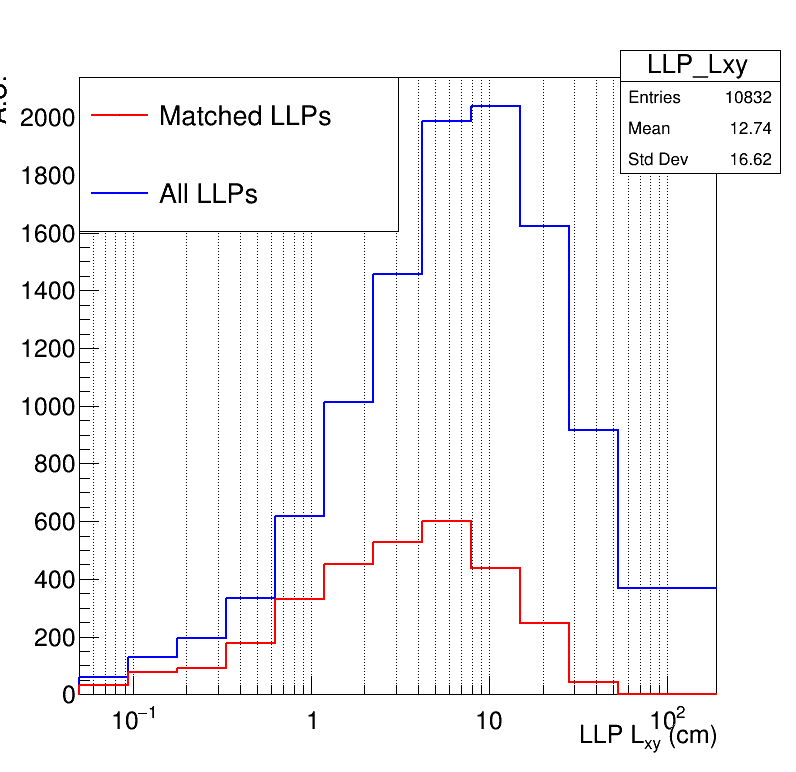

In [4]:
h_LLP_Lxy = d.Histo1D(("LLP_Lxy","LLP_Lxy",len(bins)-1,array('d',bins)),"LLP_Lxy")
h_LLP_Lxy.Draw()

h_LLP_Lxy_match_bydau = d.Histo1D(("LLP_Lxy_match_bydau","LLP_Lxy_match_bydau",len(bins)-1,array('d',bins)),"LLP_Lxy_match_dau")
h_LLP_Lxy_match_bydau.Draw()


h_neu = h_LLP_Lxy_match_bydau.GetValue()
h_den = h_LLP_Lxy.GetValue()

h_den.SetTitle(";LLP L_{xy} (cm);A.U.")

h_neu.SetLineWidth(2)
h_den.SetLineWidth(2)
h_neu.SetLineColor(ROOT.kRed)
h_den.SetLineColor(ROOT.kBlue)

h_den.Draw()
h_neu.Draw("same")

l = ROOT.TLegend(0.1,0.7,0.5,0.9)
l.AddEntry(h_neu,"Matched LLPs")
l.AddEntry(h_den,"All LLPs")
l.Draw()

c.SetLogx()
c.SetGridx()
c.Draw()

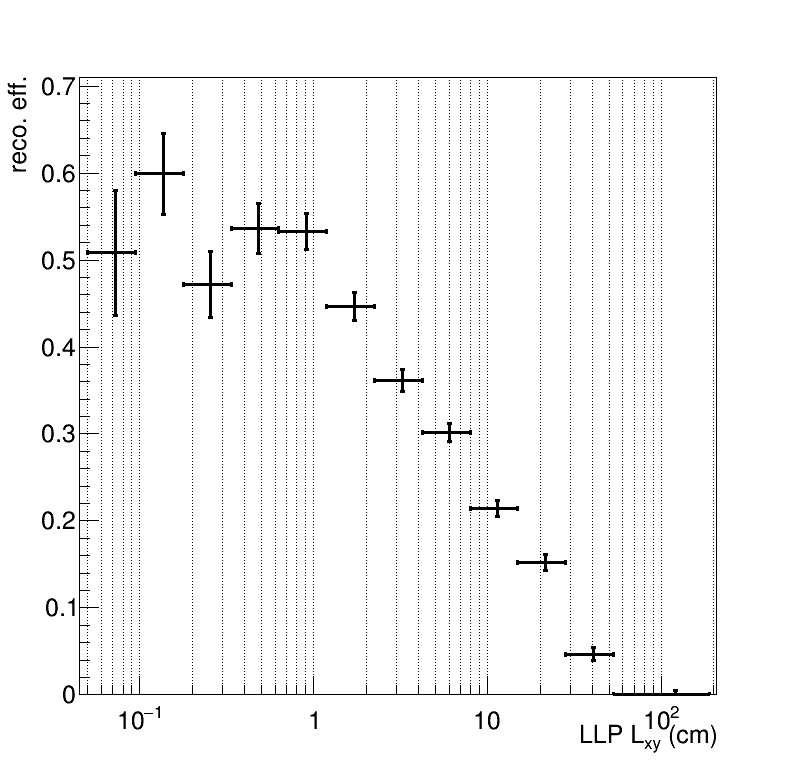

In [5]:
rat = ROOT.TEfficiency(h_LLP_Lxy_match_bydau.GetValue(),h_LLP_Lxy.GetValue())
rat.SetLineWidth(3)
rat.SetTitle(";LLP L_{xy} (cm); reco. eff.")
rat.Draw()
c.Draw()
c.SetGridx()

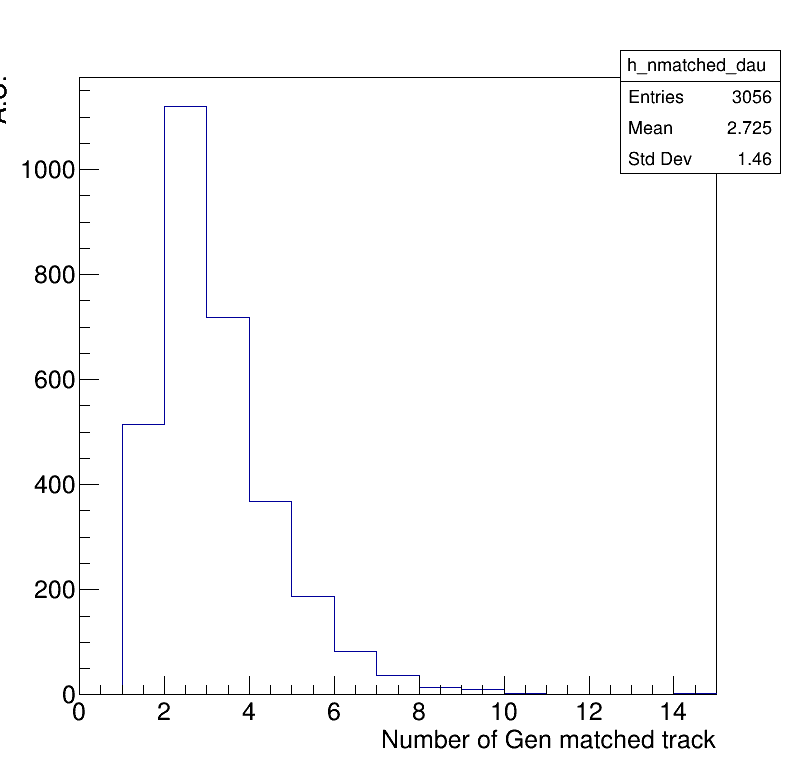

In [6]:
c1 = ROOT.TCanvas("c1","c1",800,800)
h_nmatched_dau = d.Histo1D(("h_nmatched_dau",";Number of Gen matched track;A.U.",15,0,15), "LLP_nmacheddau_dau")
h_nmatched_dau.Draw()
c1.Draw()

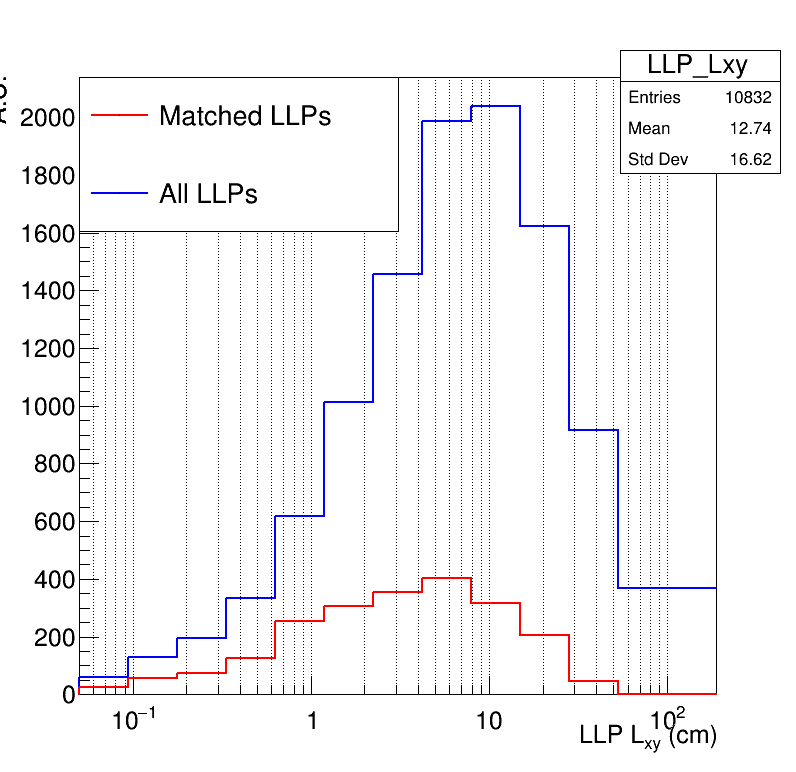

In [7]:
c2 = ROOT.TCanvas("c2","c2",800,800)
h_LLP_Lxy_match_bydist = d.Histo1D(("LLP_Lxy_match_bydist","LLP_Lxy_match_bydist",len(bins)-1,array('d',bins)),"LLP_Lxy_match_dist")
h_LLP_Lxy_match_bydist.Draw()


h_neu = h_LLP_Lxy_match_bydist.GetValue()
h_den = h_LLP_Lxy.GetValue()

h_den.SetTitle(";LLP L_{xy} (cm);A.U.")

h_neu.SetLineWidth(2)
h_den.SetLineWidth(2)
h_neu.SetLineColor(ROOT.kRed)
h_den.SetLineColor(ROOT.kBlue)

h_den.Draw()
h_neu.Draw("same")

l = ROOT.TLegend(0.1,0.7,0.5,0.9)
l.AddEntry(h_neu,"Matched LLPs")
l.AddEntry(h_den,"All LLPs")
l.Draw()

c2.SetLogx()
c2.SetGridx()
c2.Draw()

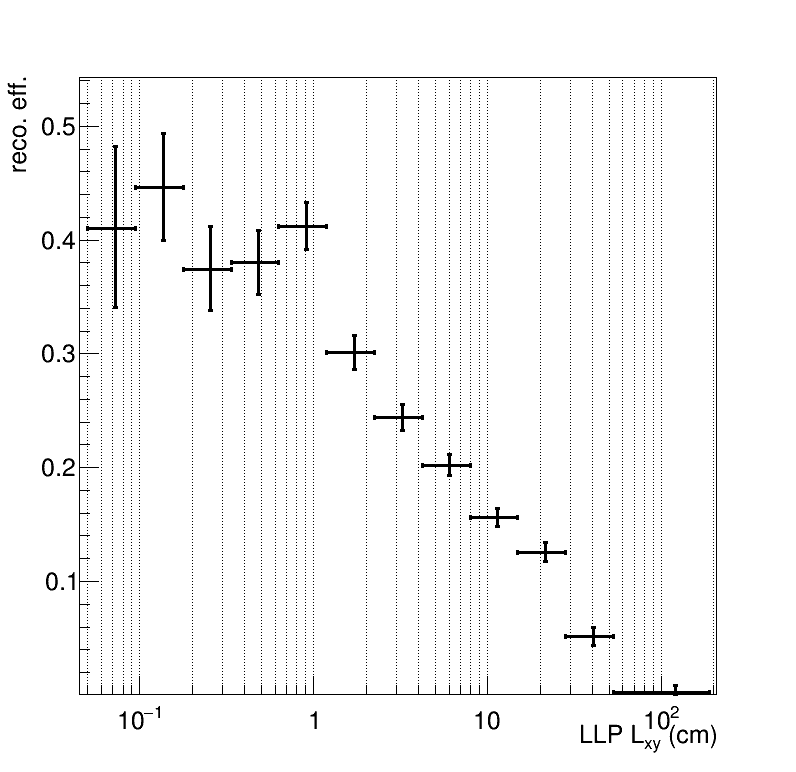

In [8]:
rat = ROOT.TEfficiency(h_LLP_Lxy_match_bydist.GetValue(),h_LLP_Lxy.GetValue())
rat.SetLineWidth(3)
rat.SetTitle(";LLP L_{xy} (cm); reco. eff.")
rat.Draw()

c2.SetLogx()
c2.Draw()
c2.SetGridx()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


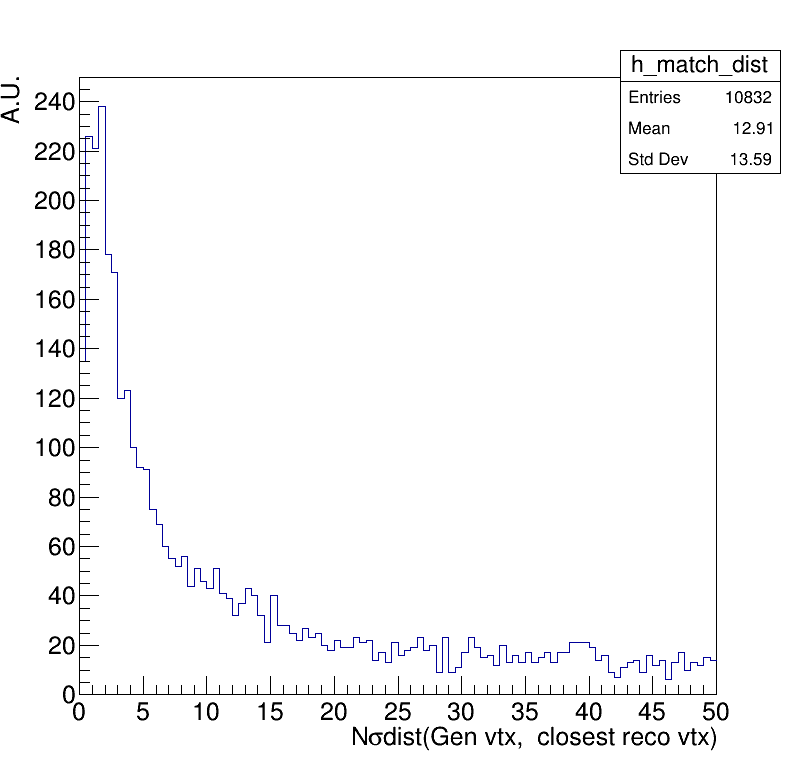

In [9]:
c1 = ROOT.TCanvas("c1","c1",800,800)
h_match_dist = d.Histo1D(("h_match_dist",";N#sigmadist(Gen vtx,  closest reco vtx);A.U.",100,0,50), "LLP_matchedSDVDist_bydist")
h_match_dist.Draw()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


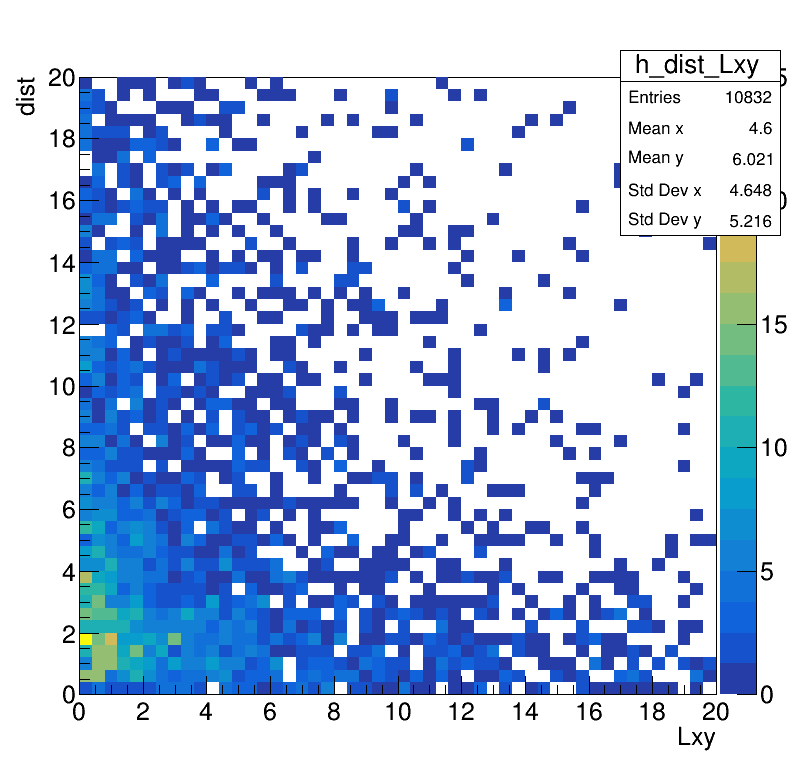

In [10]:
c1 = ROOT.TCanvas("c1","c1",800,800)
h_dist_Lxy = d.Histo2D(("h_dist_Lxy",";Lxy;dist",50,0,20,50,0,20),"LLP_Lxy","LLP_matchedSDVDist_bydist")
h_dist_Lxy.Draw("colz")
c1.Draw()

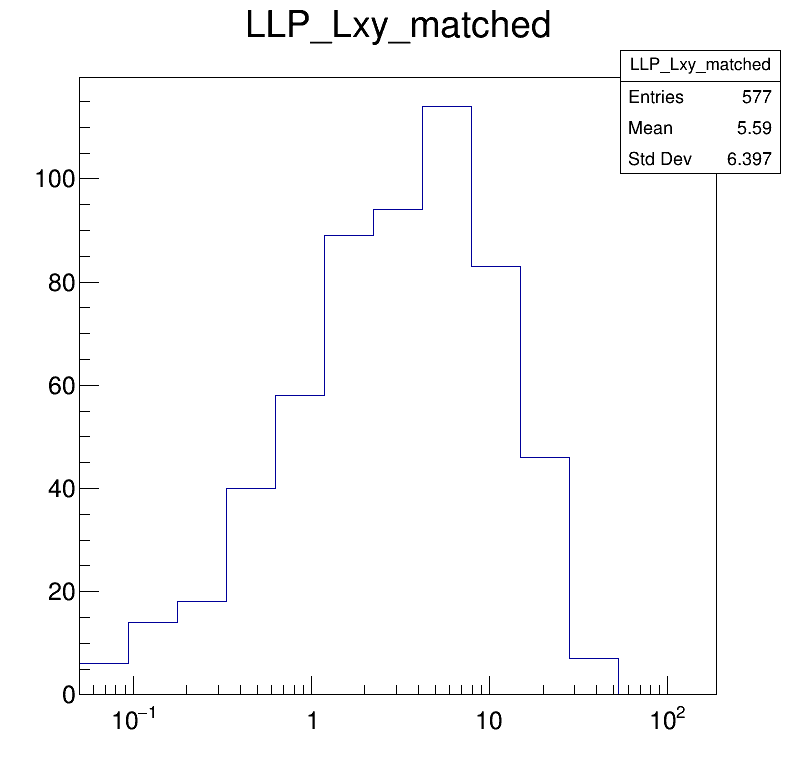

In [4]:
#d_temp = d.Filter("event==4278")
d_match = d.Define("LLP_Lxy_matched","LLP_Lxy[LLP_matched>=0]")
#d_matched = d.Filter("LLP_matched==true")
h_LLP_Lxy_matched = d_match.Histo1D(("LLP_Lxy_matched","LLP_Lxy_matched",len(bins)-1,array('d',bins)),"LLP_Lxy_matched")
h_LLP_Lxy_matched.Draw()
c.SetLogx()
c.Draw()

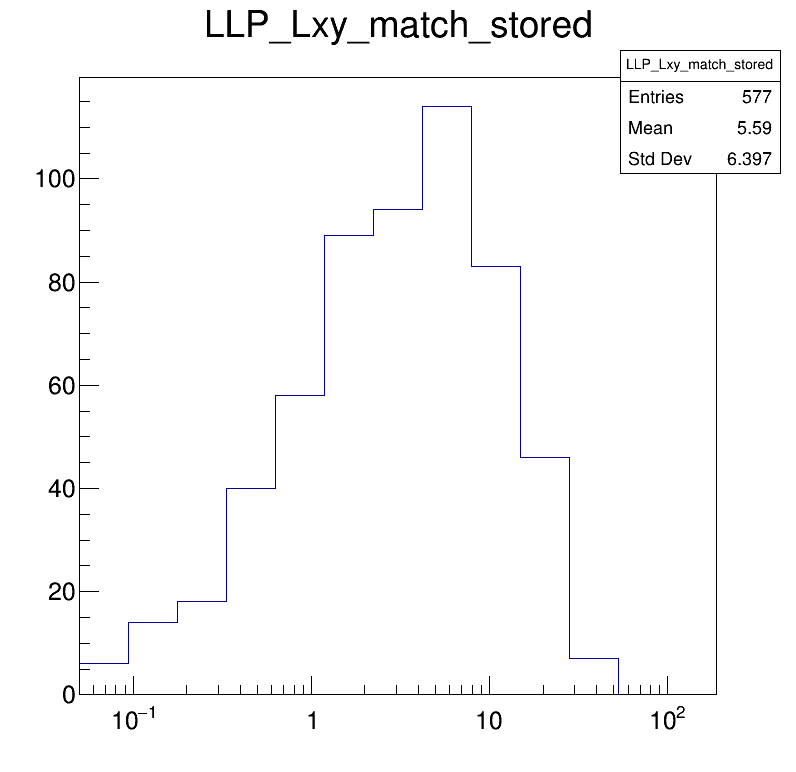

In [5]:
#d_temp = d.Filter("event==4278")
#d_match = d.Define("LLP_Lxy_matched","LLP_Lxy[LLP_matched>=0]")
d_match = d_match.Define("LLP_Lxy_match_stored", "LLP_Lxy[LLP_matchedSDVIdx_bydau>=0]")
#d_matched = d.Filter("LLP_matched==true")
h_LLP_Lxy_match_stored = d_match.Histo1D(("LLP_Lxy_match_stored","LLP_Lxy_match_stored",len(bins)-1,array('d',bins)),"LLP_Lxy_match_stored")
h_LLP_Lxy_match_stored.Draw()
c.SetLogx()
c.Draw()

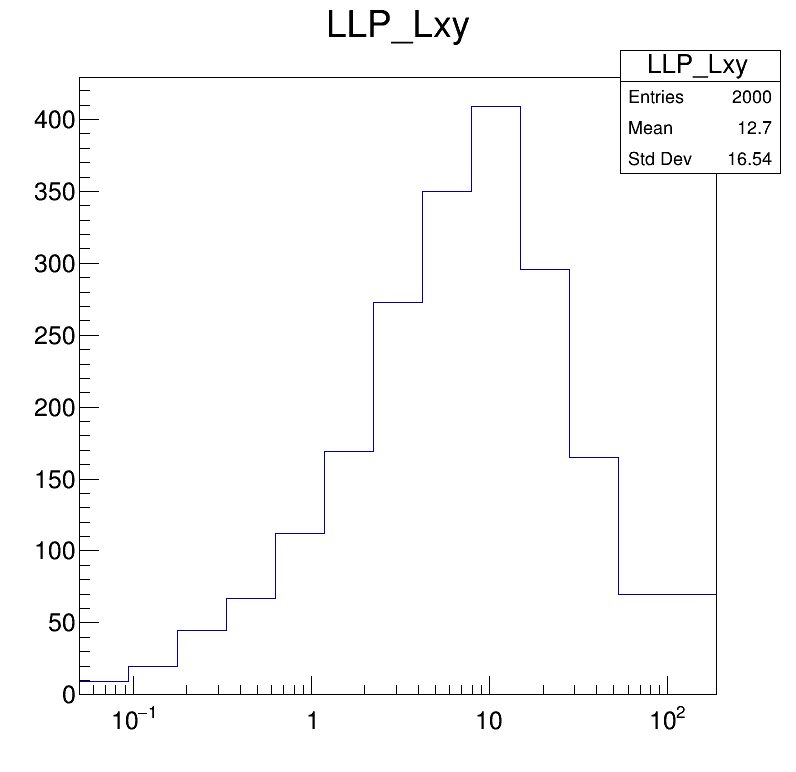

In [9]:
h_LLP_Lxy = d_match.Histo1D(("LLP_Lxy","LLP_Lxy",len(bins)-1,array('d',bins)),"LLP_Lxy")
h_LLP_Lxy.Draw()

c.Draw()

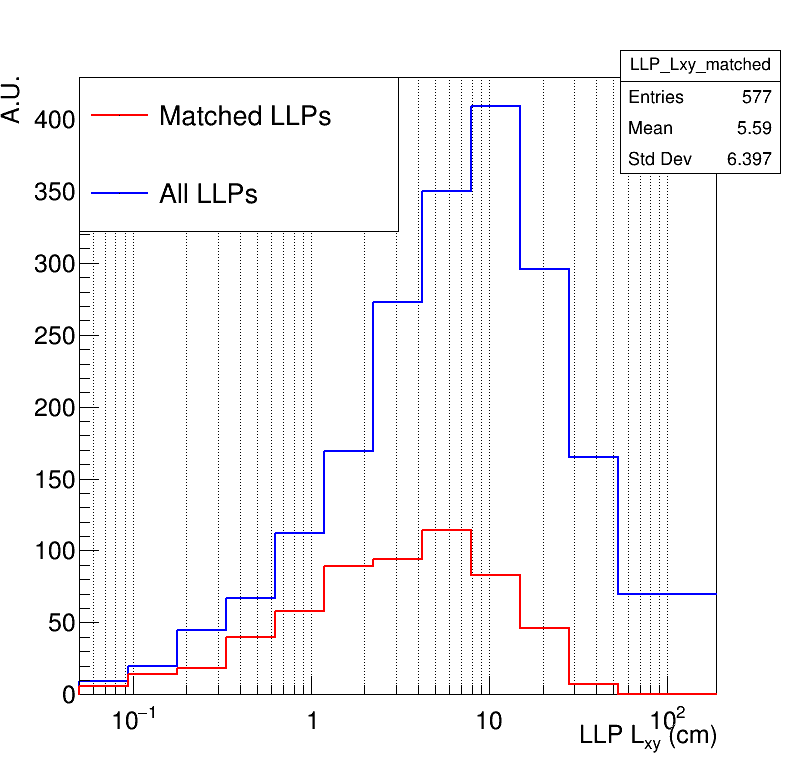

In [24]:
h_neu = h_LLP_Lxy_matched.GetValue()
h_den = h_LLP_Lxy.GetValue()

h_den.SetTitle(";LLP L_{xy} (cm);A.U.")

h_neu.SetLineWidth(2)
h_den.SetLineWidth(2)
h_neu.SetLineColor(ROOT.kRed)
h_den.SetLineColor(ROOT.kBlue)

h_den.Draw()
h_neu.Draw("same")

l = ROOT.TLegend(0.1,0.7,0.5,0.9)
l.AddEntry(h_neu,"Matched LLPs")
l.AddEntry(h_den,"All LLPs")
l.Draw()

c.Draw()

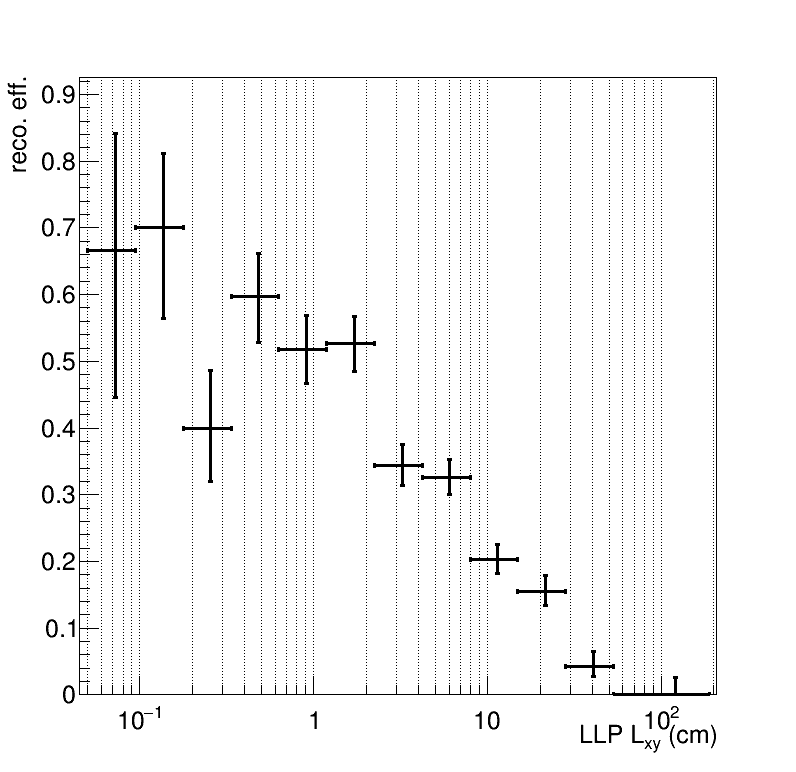

In [25]:
rat = ROOT.TEfficiency(h_LLP_Lxy_matched.GetValue(),h_LLP_Lxy.GetValue())
rat.SetLineWidth(3)
rat.SetTitle(";LLP L_{xy} (cm); reco. eff.")
rat.Draw()
c.Draw()
c.SetGridx()

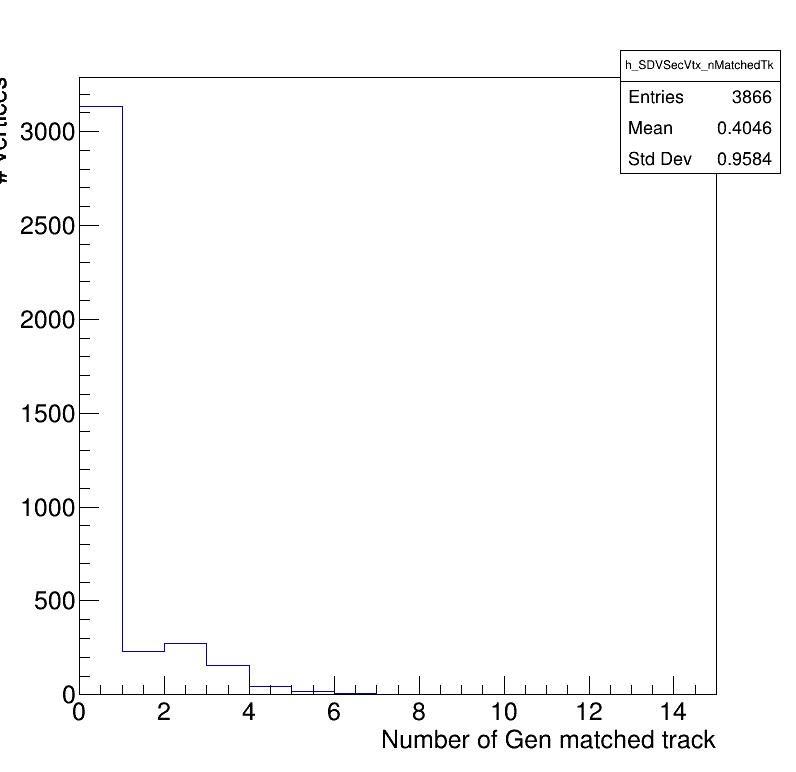

In [3]:
h_SDVSecVtx_nMatchedTk = d.Histo1D(("h_SDVSecVtx_nMatchedTk",";Number of Gen matched track;# vertices",15,0,15), "SDVSecVtx_nMatchedTk")

h_SDVSecVtx_nMatchedTk.Draw()
c.Draw()

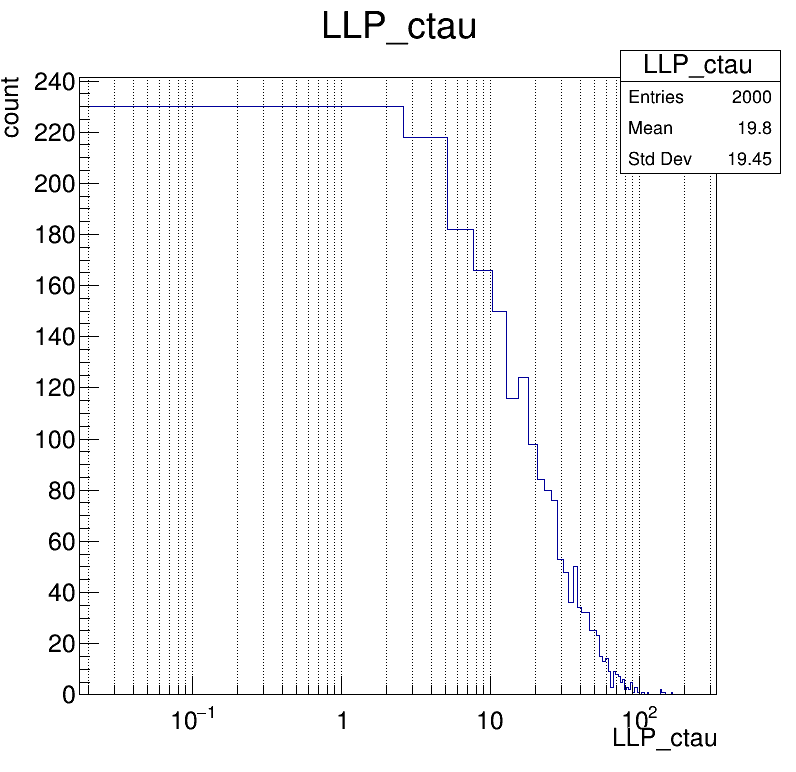

In [19]:
h_llpctau = d.Histo1D("LLP_ctau")
h_llpctau.Draw()
c.ResetDrawn()
c.Draw()